In [1]:
import matplotlib.pyplot as plt

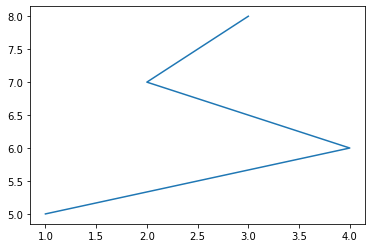

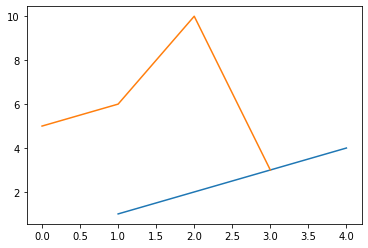

In [2]:
plt.figure(1)
plt.plot([1,2,3,4], [1,2,3,4])
plt.figure(2)
plt.plot([1,4,2,3], [5,6,7,8])
plt.savefig('Figure-Addie')
plt.figure(1)
plt.plot([5,6,10,3])
plt.savefig('Figure-Jane')

Text(0, 0.5, 'Value of Principal ($)')

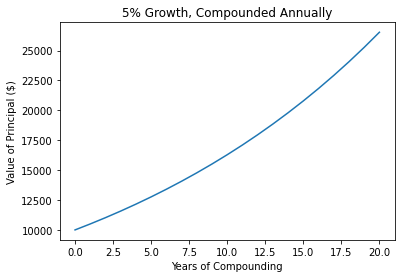

In [3]:
principal = 10000
interest_rate = 0.05
years = 20
values = []
for i in range(years+1):
    values.append(principal)
    principal += principal * interest_rate
plt.plot(values)
plt.title('5% Growth, Compounded Annually')
plt.xlabel('Years of Compounding')
plt.ylabel('Value of Principal ($)')

Text(0, 0.5, 'Value of Principal ($)')

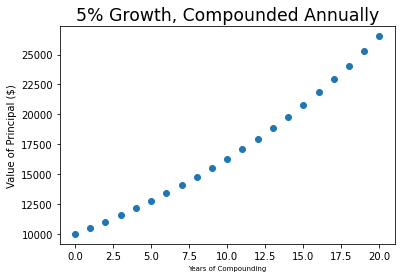

In [4]:
principal = 10000
interestRate = 0.05
years = 20
values = []
for i in range(years + 1):
    values.append(principal)
    principal += principal * interestRate
plt.plot(values, 'o', linewidth = 30)
plt.title('5% Growth, Compounded Annually',
            fontsize = 'xx-large')
plt.xlabel('Years of Compounding', fontsize = 'x-small')
plt.ylabel('Value of Principal ($)')

In [5]:
def find_payment(loan, r, m):
    """Assumes: loan and r are floats, m an int
       Returns the monthly payment for a mortgage of size
       loan at a monthly rate of r for m months"""
    return loan * ((r*(1+r)**m)/((1+r)**m - 1))

In [6]:
import numpy as np

In [7]:
class Mortgage(object):
    """Abstract class for building different kinds of mortgages"""
    def __init__(self, loan, annRate, months):
        self._loan = loan
        self._rate = annRate / 12.0
        self._months = months
        self._paid = [0.0]
        self._outstanding = [loan]
        self._payment = find_payment(loan, self._rate, months)
        self._legend = None # description of mortgage
    
    def make_payment(self):
        self._paid.append(self._payment)
        reduction = self._payment - self._outstanding[-1] * self._rate
        self._outstanding.append(self._outstanding[-1] - reduction)
    
    def get_total_paid(self):
        return sum(self._paid)
    def __str__(self):
        return self._legend
    
    def plot_payments(self, style):
        plt.plot(self._paid[1:], style, label = self._legend)
    
    def plot_balance(self, style):
        plt.plot(self._outstanding, style, label = self._legend)
    
    def plot_tot_pd(self, style):
        tot_pd = [self._paid[0]]
        for i in range(1, len(self._paid)):
            tot_pd.append(tot_pd[-1] + self._paid[i])
        plt.plot(tot_pd, style, label = self._legend)
    
    def plot_net(self, style):
        tot_pd = [self._paid[0]]
        for i in range(1, len(self._paid)):
            tot_pd.append(tot_pd[-1] + self._paid[i])
        equity_acquired = np.array([self._loan] * len(self._outstanding))
        equity_acquired = equity_acquired - np.array(self._outstanding)
        net = np.array(tot_pd) - equity_acquired
        plt.plot(net, style, label = self._legend)

In [8]:
a1 = np.array([1, 2, 4])
print('a1 =', a1)
a2 = a1 * 2
print('a2 =', a2)
print('a1 + 3 =', a1 + 3)
print('3 - a1 =', 3 - a1)
print('a1 - a2 =', a1 - a2)
print('a1 * a2 =', a1 * a2)

a1 = [1 2 4]
a2 = [2 4 8]
a1 + 3 = [4 5 7]
3 - a1 = [ 2  1 -1]
a1 - a2 = [-1 -2 -4]
a1 * a2 = [ 2  8 32]


In [9]:
class Fixed(Mortgage):
    def __init__(self, loan, r, months):
        Mortgage.__init__(self, loan, r, months)
        self._legend = f'Fixed, {r*100:.1f}%'

class Fixed_with_pts(Mortgage):
    def __init__(self, loan, r, months, pts):
        Mortgage.__init__(self, loan, r, months)
        self._pts = pts
        self._paid = [loan * (pts/100)]
        self._legend = f'Fixed, {r*100:.1f}%, {pts} points'

class Two_rate(Mortgage):
    def __init__(self, loan, r, months, teaser_rate, teaser_months):
        Mortgage.__init__(self, loan, teaser_rate, months)
        self._teaser_months = teaser_months
        self._teaser_rate = teaser_rate
        self._nextRate = r / 12
        self._legend = (f'{100*teaser_rate:.1f}% for ' +
                f'{self._teaser_months} months, then {100*r:.1f}%')
    
    def make_payment(self):
        if len(self._paid) == self._teaser_months + 1:
            self._rate = self._nextRate
            self._payment = find_payment(self._outstanding[-1],
                                self._rate,
                                self._months - self._teaser_months)
        Mortgage.make_payment(self)

In [10]:
def compare_mortgages(amt, years, fixed_rate, pts, pts_rate,
                      var_rate1, var_rate2, var_months):
    tot_months = years * 12
    fixed1 = Fixed(amt, fixed_rate, tot_months)
    fixed2 = Fixed_with_pts(amt, pts_rate, tot_months, pts)
    two_rate = Two_rate(amt, var_rate2, tot_months, var_rate1, var_months)
    morts = [ fixed1, fixed2, two_rate]
    for m in range(tot_months):
        for mort in morts:
            mort.make_payment()
    plot_mortgages(morts, amt)

In [11]:
def plot_mortgages(morts, amt):
    def label_plot(figure, title, x_label, y_label):
        plt.figure(figure)
        plt.title(title)
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.legend(loc = 'best')
    styles = ['-', '-.', ':']
    # Give names to figure numbers
    payments, cost, balance, net_cost = 0, 1, 2, 3
    for i in range(len(morts)):
        plt.figure(payments)
        morts[i].plot_payments(styles[i])
        plt.figure(cost)
        morts[i].plot_tot_pd(styles[i])
        plt.figure(balance)
        morts[i].plot_balance(styles[i])
        plt.figure(net_cost)
        morts[i].plot_net(styles[i])
    label_plot(payments, f'Monthly Payments of ${amt:,} Mortgages',
               'Months', 'Monthly Payments')
    label_plot(cost, f'Cash Outlay of ${amt:,} Mortgages',
               'Months', 'Total Payments')
    label_plot(balance, f'Balance Remaining of ${amt:,} Mortgages',
               'Months', 'Remaining Loan Balance of $')
    label_plot(net_cost, f'Net Cost of ${amt:,} Mortgages',
               'Months', 'Payments - Equity $')

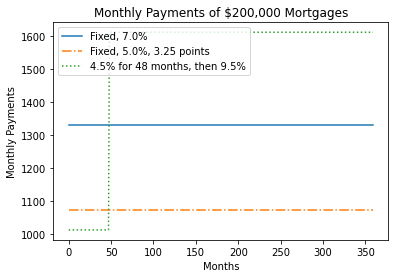

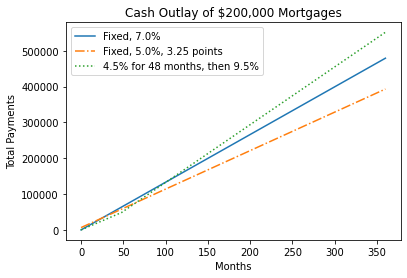

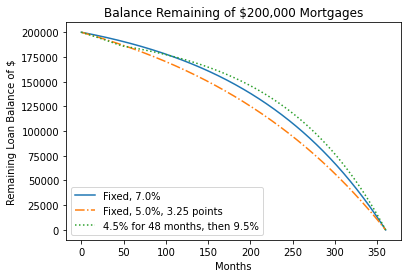

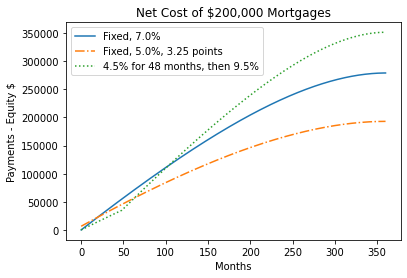

In [12]:
compare_mortgages(amt=200000, years=30, fixed_rate=0.07,
                  pts=3.25, pts_rate=0.05, var_rate1=0.045,
                  var_rate2=0.095, var_months=48)

In [13]:
def simulation(fixed, variable):
    infected = [fixed['initial_infections']]
    new_infections = [fixed['initial_infections']]
    total_infections = fixed['initial_infections']

    for t in range(fixed['duration']):
        cur_infections = infected[-1]
        # remove people who are no longer contagious
        if len(new_infections) > fixed['days_spreading']:
            cur_infections -= new_infections[-fixed['days_spreading']-1]
        # if social distancing, change number of daily contacts
        if t >= variable['red_start'] and t < variable['red_end']:
            daily_contacts = variable['red_daily_contacts']
        else:
            daily_contacts = fixed['init_contacts']
        # compute number of new cases
        total_contacts = cur_infections * daily_contacts
        susceptible = fixed['pop'] - total_infections
        risky_contacts = total_contacts * (susceptible/fixed['pop'])
        newly_infected = round(risky_contacts * fixed['contagiousness'])
        # update variables
        new_infections.append(newly_infected)
        total_infections += newly_infected
        infected.append(cur_infections + newly_infected)
    
    return infected, total_infections

In [14]:
def plot_infections(infections, total_infections, fixed):
    infection_plot = plt.plot(infections, 'r', label = 'Infected')[0]
    plt.xticks(fontsize = 'large')
    plt.yticks(fontsize = 'large')
    plt.xlabel('Days Since First Infection', fontsize = 'xx-large')
    plt.ylabel('Number Currently Infected', fontsize = 'xx-large')
    plt.title('Number of Infections Assuming No Vaccine\n' +
              f'Pop = {fixed["pop"]:,}, ' +
              f'Contacts/Day = {fixed["init_contacts"]}, ' +
              f'Infectivity = {(100*fixed["contagiousness"]):.1f}%, ' +
              f'Days Contagious = {fixed["days_spreading"]}',
              fontsize = 'xx-large')
    plt.legend(fontsize = 'xx-large')
    txt_box = plt.text(plt.xlim()[1]/2, plt.ylim()[1]/1.25,
                       f'Total Infections = {total_infections:,.0f}',
                       fontdict = {'size': 'xx-large', 'weight': 'bold',
                                   'color': 'red'})
    return infection_plot, txt_box

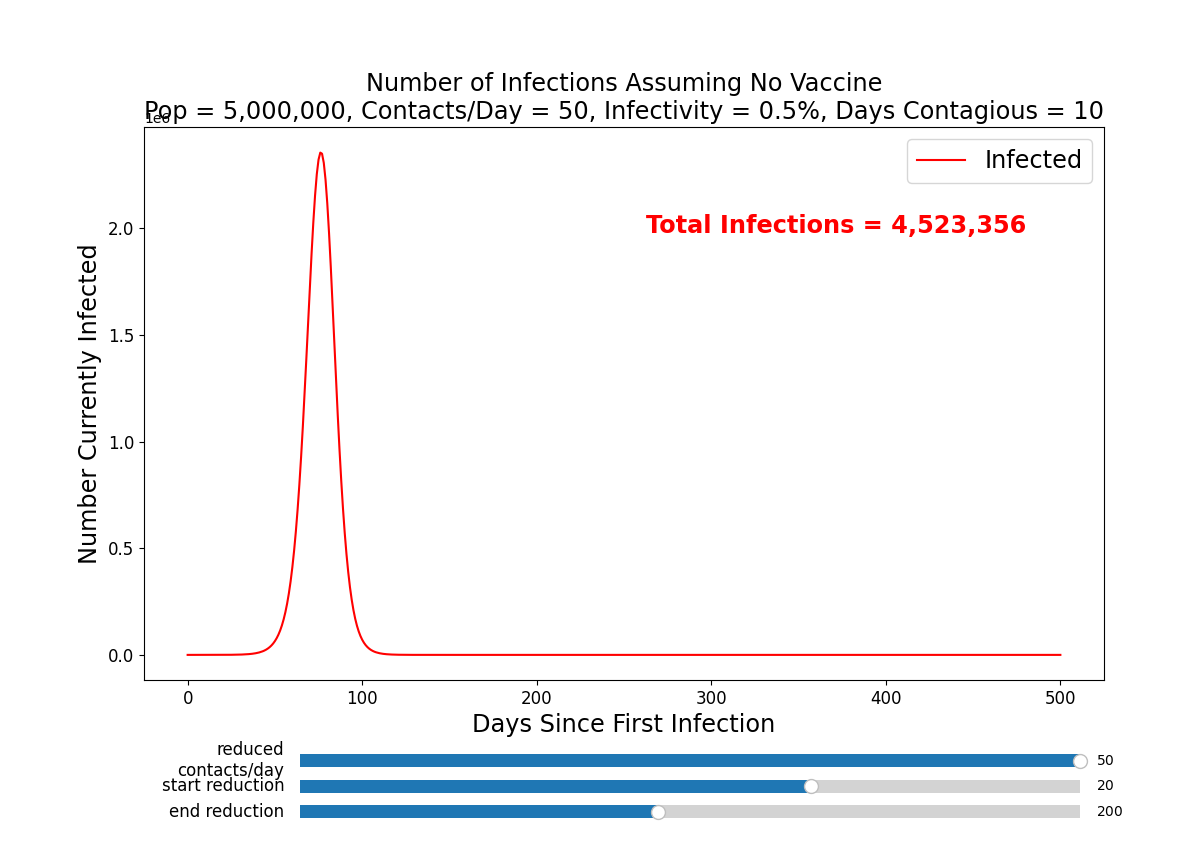

In [15]:
%matplotlib widget
from matplotlib.widgets import Slider

fixed = {
    'pop': 5000000, # population at risk
    'duration': 500, # number of days for simulation
    'initial_infections': 4, # initial number of cases
    'init_contacts': 50, # contacts without social distancing
    'contagiousness': 0.005, # prob. of getting disease if exposed
    'days_spreading': 10 # days contagious after infection
}
variable = {
    # 'red_daily_contacts': 4, # social distancing
    'red_daily_contacts': fixed['init_contacts'], # social distancing
    'red_start': 20, # start of social distancing
    'red_end': 200 # end of social distancing
}

fig = plt.figure(figsize = (12, 8.5))

infections_ax = plt.axes([0.12, 0.2, 0.8, 0.65])
contacts_ax = plt.axes([0.25, 0.09, 0.65, 0.03])
start_ax = plt.axes([0.25, 0.06, 0.65, 0.03])
end_ax = plt.axes([0.25, 0.03, 0.65, 0.03])

contacts_slider = Slider(
    contacts_ax, # axes object containing the slider
    'reduced\ncontacts/day', # name of slider
    0,  # minimal value of the parameter
    50, # maximal value of the parameter
    50  # initial value of the parameter
)
contacts_slider.label.set_fontsize(12)
start_day_slider = Slider(start_ax, 'start reduction', 1, 30, 20)
start_day_slider.label.set_fontsize(12)
end_day_slider = Slider(end_ax, 'end reduction', 30, 400, 200)
end_day_slider.label.set_fontsize(12)

def update(fixed, infection_plot, txt_box,
           contacts_slider, start_day_slider, end_day_slider):
    variable = {'red_daily_contacts': contacts_slider.val,
                'red_start': start_day_slider.val,
                'red_end': end_day_slider.val}
    I, total_infections = simulation(fixed, variable)
    infection_plot.set_ydata(I)   # new y-coordinates for plot
    txt_box.set_text(f'Total Infections = {total_infections:,.0f}')

slider_update = lambda _: update(fixed, infection_plot, txt_box,
                                 contacts_slider, start_day_slider,
                                 end_day_slider)
contacts_slider.on_changed(slider_update)
start_day_slider.on_changed(slider_update)
end_day_slider.on_changed(slider_update)

infections, total_infections = simulation(fixed, variable)
plt.axes(infections_ax)
infection_plot, txt_box = plot_infections(infections, total_infections, fixed)